In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Adults.txt")

In [38]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital_status          Occupation    Relationship    Race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [39]:
df.columns

Index([u'Age', u'Workclass', u'Fnlwgt', u'Education', u'Education_num',
       u'Marital_status', u'Occupation', u'Relationship', u'Race', u'Gender',
       u'Capital_gain', u'Capital_loss', u'Hours_per_week', u'Native_country',
       u'Salary'],
      dtype='object')

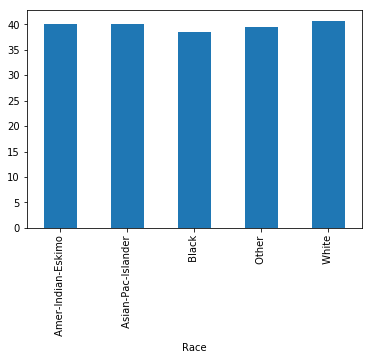

Race
 Amer-Indian-Eskimo    40.048232
 Asian-Pac-Islander    40.127045
 Black                 38.422855
 Other                 39.468635
 White                 40.689100
Name: Hours_per_week, dtype: float64


In [71]:
grouped_df = df.groupby('Race')['Hours_per_week'].mean()
grouped_df.plot.bar()
plt.show()


print(grouped_df)

On an average the persons from all the Races work about the same number of hours per week. The higher Hours_per_week is for Category- Whites and the Lowest Hours_per_week is for Category-Black

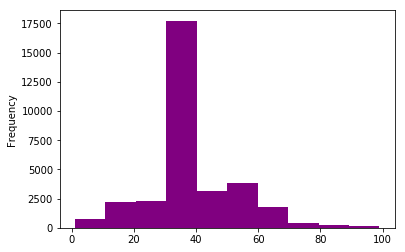

In [41]:
df['Hours_per_week'].plot.hist(color='purple')
plt.show()

Analyzing the Hours_per_week, it is seen the histogram peaks at the values from 30 to 40, which indicates that most people in the dataset, works about 30 to 40 hours per week.

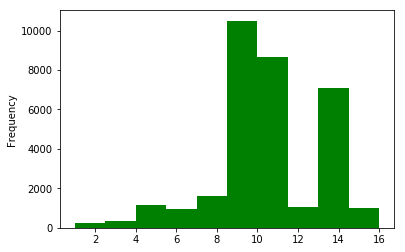

In [72]:
df['Education_num'].plot.hist(color='green')
plt.show()

Looking at the column, Education_num, it is seen that the histogram spikes at three points between 9-11 and 13-14. This indicates that Education_num with 9,10 and 13 occur more in the dataset. This can be verified from the next two cells.

In [78]:
print df.loc[df['Education_num'] == 9, 'Education'].unique()
print df.loc[df['Education_num'] == 10, 'Education'].unique()
print df.loc[df['Education_num'] == 13, 'Education'].unique()

[' HS-grad']
[' Some-college']
[' Bachelors']


In [79]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [80]:
mean_hours = df.groupby('Education')['Hours_per_week'].mean()
print mean_hours

Education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: Hours_per_week, dtype: float64


In [81]:
new_df = df[['Education_num','Hours_per_week','Race']]

new_df.head()

Education_num  Hours_per_week    Race
0             13              40   White
1             13              13   White
2              9              40   White
3              7              40   Black
4             13              40   Black

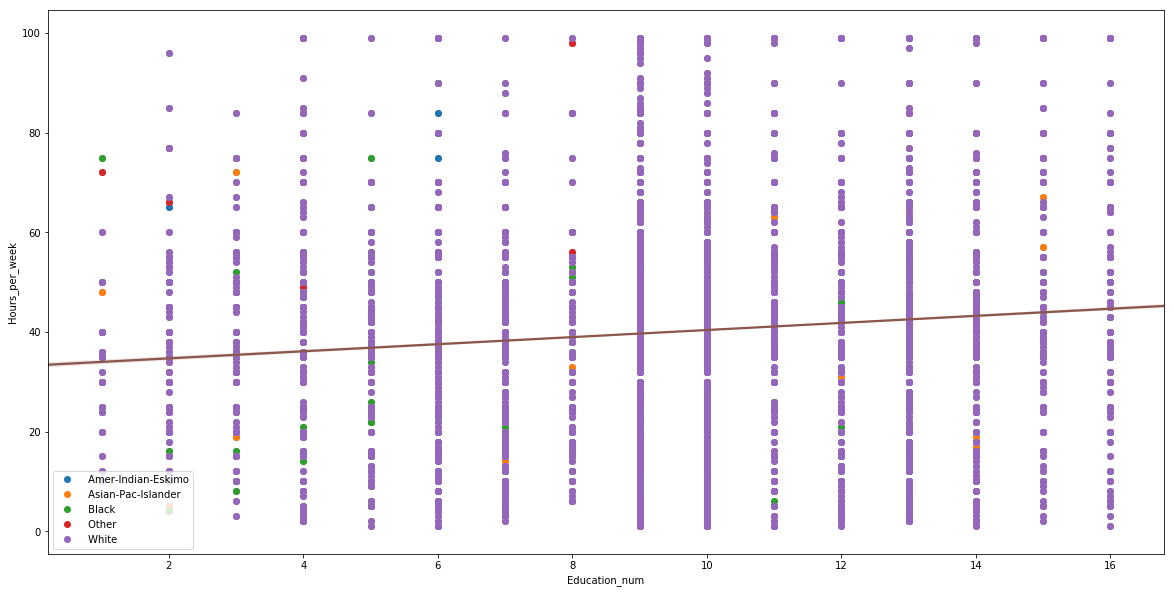

In [82]:
races = new_df.groupby('Race')

fig,ax = plt.subplots(figsize=(20,10))

for name, race in races:
    ax.plot(race.Education_num,race.Hours_per_week,marker='o',linestyle='',label=name)
sns.regplot(df.Education_num,df.Hours_per_week)    
ax.legend(loc="lower left")

plt.show()

The above plot shows the plot of Hours_per_week with Education_num. The prominent color is purple, which shows that most data represents that for the Category-White. The line of best fit is almost horizontal, which indicates there is no major relation between Education_num and Hours_per_week